# Data Preparation and Exploration

This notebook contains code for exploring and visualizing the data 

In [10]:
# Standard library imports
import os
import random
from PIL import Image

# PyTorch and torchvision imports
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Data visualization imports
import matplotlib.pyplot as plt

# Project-specific imports
from hamburger_hotdog_pizza_classifier.config import PROCESSED_DATA_DIR, RAW_DATA_DIR

# Directory paths
image_path = RAW_DATA_DIR

# Data loading parameters
BATCH_SIZE = 32

In [2]:
def walk_through_directory(directory):
    """Walks through dir_path returning its contents."""
    for dirpath, dirnames, filenames in os.walk(directory):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [3]:
walk_through_directory(image_path)

There are 4 directories and 2 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw
There are 2 directories and 2 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food-101
There are 101 directories and 0 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food-101\images
There are 0 directories and 1000 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food-101\images\apple_pie
There are 0 directories and 1000 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food-101\images\baby_back_ribs
There are 0 directories and 1000 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food-101\images\baklava
There are 0 directories and 1000 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food-101\images\beef_carpaccio
There are 0 directories and 1000 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food-101\images\beef_tartare
There are 0 directories and 1000 images in C:\Git\hamburger-hotdog-pizza-classifier\data\raw\food

In [4]:
# Setup train and testing paths
train_dir = image_path / 'train'
test_dir = image_path / 'test'
test_dir, train_dir

(WindowsPath('C:/Git/hamburger-hotdog-pizza-classifier/data/raw/test'),
 WindowsPath('C:/Git/hamburger-hotdog-pizza-classifier/data/raw/train'))

## Step 2: Visualize Image

Let's write some code to:
1. Get all the image paths
2. Pick a random image path using Python's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

Random image path: C:\Git\hamburger-hotdog-pizza-classifier\data\raw\train\hot_dog\91869.jpg
Image class: hot_dog
Image size: (512, 383)


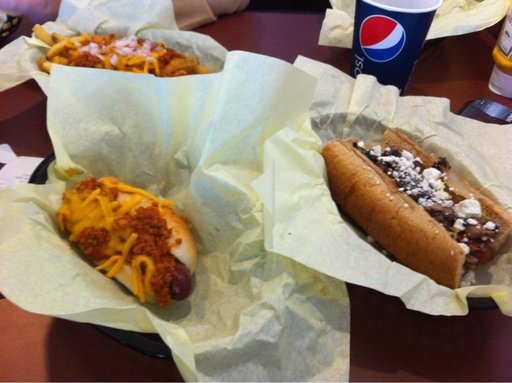

In [5]:
# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Randomly select a random image from the image path 
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

#4. Open image
img = Image.open(random_image_path)

#5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image size: {img.size}")
img

## 3. Transforming Data

Before we can use our image data with PyTorch:
1. Turn your target data into tensors (in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset`

In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
])

In [7]:
transform(img).shape

torch.Size([3, 224, 224])

In [8]:
train_dir

WindowsPath('C:/Git/hamburger-hotdog-pizza-classifier/data/raw/train')

In [9]:
train_data = ImageFolder(train_dir, transform=transform)
test_data = ImageFolder(test_dir, transform=transform)
len(train_data)

2250

In [344]:
class_names = train_data.classes
class_names
class_names_to_idx = train_data.class_to_idx
class_names_to_idx

In [349]:
random_index = random.randint(0, len(train_data))
img, label = train_data[random_index]
print("Label:", class_names[label])
img

In [357]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

train_loader, test_loader

In [ ]:
len(train_loader), len(test_loader)